In [1]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [2]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [3]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [4]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv('diabetes.csv')

# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=16, test_size=0.2)

# Train model
logreg = LogisticRegression(max_iter=1000, random_state=16)
logreg.fit(X_train, y_train)

# Predict & evaluate
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

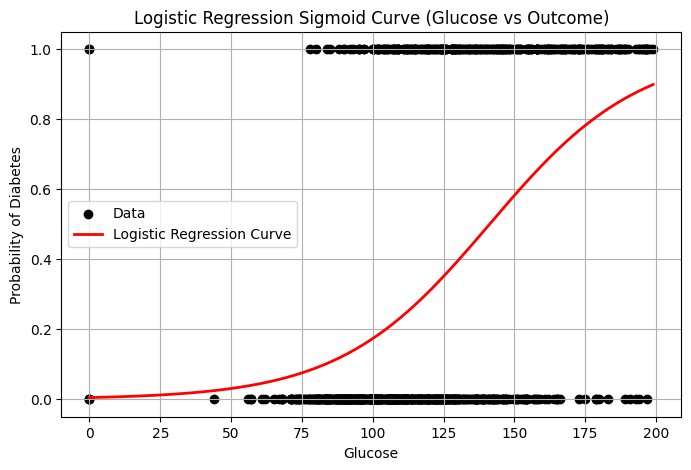

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Load data
df = pd.read_csv('diabetes.csv')

# Feature and label
X = df[['Glucose']]
y = df['Outcome']

# Train logistic regression
model = LogisticRegression()
model.fit(X, y)

# Generate prediction range with correct feature name
X_test_vals = np.linspace(X['Glucose'].min(), X['Glucose'].max(), 300)
X_test_df = pd.DataFrame({'Glucose': X_test_vals})
y_prob = model.predict_proba(X_test_df)[:, 1]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='black', label='Data')
plt.plot(X_test_vals, y_prob, color='red', linewidth=2, label='Logistic Regression Curve')
plt.xlabel('Glucose')
plt.ylabel('Probability of Diabetes')
plt.title('Logistic Regression Sigmoid Curve (Glucose vs Outcome)')
plt.legend()
plt.grid(True)
plt.show()


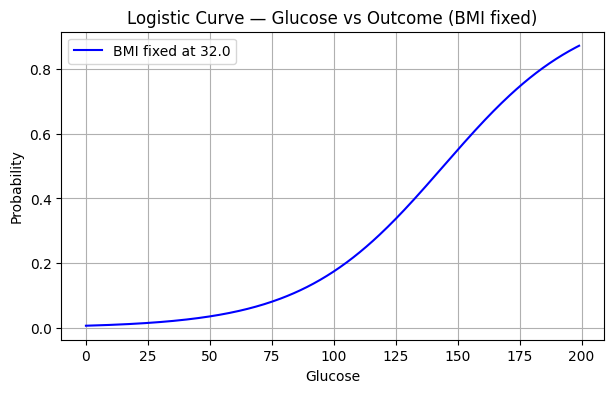

In [7]:
X = df[['Glucose', 'BMI']]
y = df['Outcome']

model = LogisticRegression()
model.fit(X, y)

# Fix BMI, vary Glucose
glucose_vals = np.linspace(df['Glucose'].min(), df['Glucose'].max(), 300)
bmi_fixed = np.median(df['BMI'])
X_test_df = pd.DataFrame({'Glucose': glucose_vals, 'BMI': bmi_fixed})
y_prob = model.predict_proba(X_test_df)[:, 1]

# Plot
plt.figure(figsize=(7, 4))
plt.plot(glucose_vals, y_prob, color='blue', label=f'BMI fixed at {bmi_fixed:.1f}')
plt.title('Logistic Curve — Glucose vs Outcome (BMI fixed)')
plt.xlabel('Glucose')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()


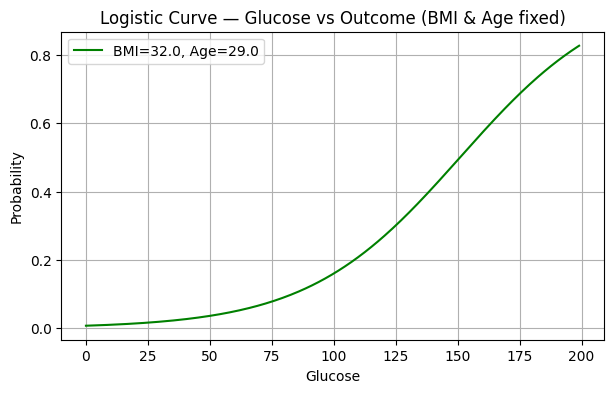

In [8]:
X = df[['Glucose', 'BMI', 'Age']]
y = df['Outcome']

model = LogisticRegression()
model.fit(X, y)

# Fix BMI and Age, vary Glucose
glucose_vals = np.linspace(df['Glucose'].min(), df['Glucose'].max(), 300)
bmi_fixed = np.median(df['BMI'])
age_fixed = np.median(df['Age'])
X_test_df = pd.DataFrame({
    'Glucose': glucose_vals,
    'BMI': bmi_fixed,
    'Age': age_fixed
})
y_prob = model.predict_proba(X_test_df)[:, 1]

# Plot
plt.figure(figsize=(7, 4))
plt.plot(glucose_vals, y_prob, color='green', label=f'BMI={bmi_fixed:.1f}, Age={age_fixed}')
plt.title('Logistic Curve — Glucose vs Outcome (BMI & Age fixed)')
plt.xlabel('Glucose')
plt.ylabel('Probability')
plt.grid(True)
plt.legend()
plt.show()


In [9]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[95,  7],
       [21, 31]])

In [13]:
import pandas as pd

# Manual input as DataFrame with correct column names
manual_input = pd.DataFrame([{
    'Glucose': 142,
    'BMI': 30.0,
    'Age': 45
}])

# Predict
prediction = model.predict(manual_input)

# Output
print(f"Predicted Outcome (0 = No Diabetes, 1 = Diabetes): {prediction[0]}")


Predicted Outcome (0 = No Diabetes, 1 = Diabetes): 1


In [11]:
from sklearn.metrics import confusion_matrix

# See actual TP, TN, FP, FN
print(confusion_matrix(y_test, y_pred))

[[95  7]
 [21 31]]


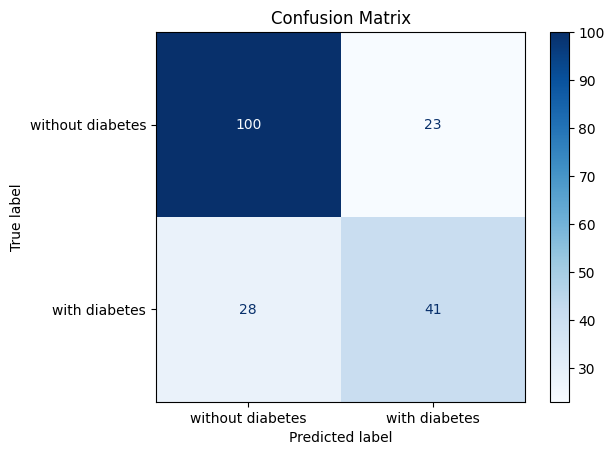

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

# Manually defined confusion matrix
cm = np.array([[100, 23],
               [28, 41]])

# Class labels
labels = ['without diabetes', 'with diabetes']

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()


In [14]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       102
   with diabetes       0.82      0.60      0.69        52

        accuracy                           0.82       154
       macro avg       0.82      0.76      0.78       154
    weighted avg       0.82      0.82      0.81       154



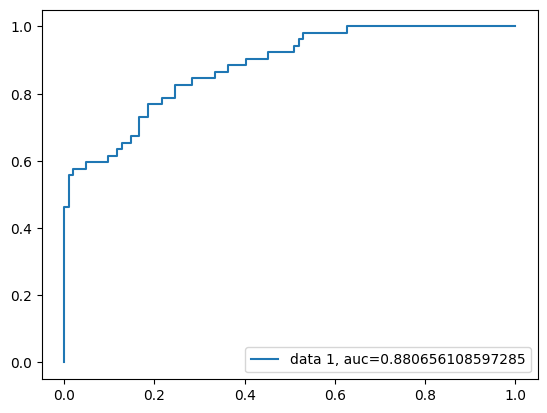

In [15]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# 